# Entorno de trabajo

Puesta en marcha de Python, jupyter notebooks y OpenCV.

Usaremos la distribución "Anaconda", que se instala en cualquier directorio sin necesidad de privilegios de administración.

## Instalación

Clonamos [el repositorio](https://github.com/albertoruiz/umucv) con el material de la asignatura:

    git clone https://github.com/albertoruiz/umucv.git
    
En días sucesivos lo iremos actualizando con

    git pull
    
Otra posibilidad es descargar solo [la versión más reciente](https://github.com/albertoruiz/umucv/archive/master.zip):

    wget https://github.com/albertoruiz/umucv/archive/master.zip
    unzip master.zip

### LINUX

Descargamos [miniconda](https://conda.io/miniconda.html) para nuestro sistema con python 3 y lo instalamos:

    bash Miniconda3-latest-Linux-x86_64.sh

Nos preguntará si queremos inicializar la instalación (sí), y nos indicará la forma de configurarlo para que los terminales no arranquen automáticamente dentro del entorno base.

Una vez instalado hay que cerrar el terminal y abrir otro para que los cambios tengan efecto.

Comprobamos que está bien instalado:

    > conda activate base

    (base) usuario @ maquina> python --version

    Python 3.10.8

Luego creamos un [entorno de conda](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) para la asignatura e instalamos los paquetes necesarios:

    conda create --name via python==3.10.8
    conda activate via
    pip install mediapipe jupyterlab scikit-learn scikit-image pydot

Usaremos también dlib, que tarda un buen rato en compilar, pero podemos instalar una versión precompilada mediante el script `install_dlib.sh`. Y necesitaremos tensorflow. La versión concreta se indicará más adelante.

En muchos ejercios y ejemplos de código usaremos un paquete con funciones de utilidad de la asignatura:

    pip install http://robot.inf.um.es/material/umucv.tar.gz  

Creamos un segundo entorno para algunos programas especiales:

    conda create --name viagl python==3.8.5
    conda activate viagl
    pip install mediapipe pyqtgraph==0.12.3 pyopengl pyqt5==5.14.1

Podemos añadir al final de nuestro `.bashrc` una orden `conda activate via` para que los terminales que abramos estén automáticamente en el entorno deseado.

Una opción interesante es instalar el sistema en un pendrive de modo que se pueda utilizar inmediatamente en cualquier ordenador (con linux) sin necesidad de instalar nada. Si estás interesado en esta solución consulta los detalles al profesor.

Puede ser útil:

    pip install jupyter_nbextensions_configurator

### WINDOWS

Instalamos [anaconda completo](https://www.anaconda.com/distribution/#download-section).

En anaconda prompt ejecutamos
    
    python -m pip install mediapipe
    
    python -m pip install pyqtgraph pyopengl PySide2 PyQt5
    
    conda install -c conda-forge dlib
    
    python -m pip install http://robot.inf.um.es/material/umucv.tar.gz  

Para comprobar que la instalación es correcta abrimos un nuevo anaconda prompt, nos cambiamos al subdirectorio de la asignatura y ejecutamos algunos programa de prueba:

    cd ubicacion/del/repositorio/umucv/code
    python webcam.py
    python stream.py
    python stream.py --dev=../images/rot4.mjpg
    python surface.py
    

Otra posibilidad es utilizar el Subsistema Linux de Windows (WSL), como se explica en [este notebook](WSL.ipynb) realizado por vuestro compañero Vladyslav Grechyshkin.

### MAC

Las instrucciones de instalación se explican en [este notebook](MAC.ipynb) realizado por vuestro compañero Eduardo Salmerón Castaño.

Las instrucciones de instalación para el Mac M1 se explican en [este notebook](MAC-M1.ipynb) realizado por vuestro compañero José Luis Mellina Andreu.

### COLAB

Podemos abrir los notebooks en las máquinas de google, que tienen instalados casi todos los paquetes necesarios. (Hay que descargar cada vez las imágenes de ejemplo y otros archivos auxiliares o leerlos de ubicaciones remotas.) Son especialmente útiles para experimentos de Deep Learning porque permiten utilizar GPUs y TPUs.

[https://colab.research.google.com/github/albertoruiz/umucv/blob/master/notebooks/VIA.ipynb](https://colab.research.google.com/github/albertoruiz/umucv/blob/master/notebooks/VIA.ipynb)

## Versiones

In [1]:
from platform import python_version
print(f'python      {python_version()}')
import numpy
print(f'numpy       {numpy.__version__}')
import matplotlib
print(f'matplotlib  {matplotlib.__version__}')
import sklearn
print(f'sklearn     {sklearn.__version__}')
import cv2
print(f'OpenCV      {cv2.__version__}')

python      3.10.9
numpy       1.23.5
matplotlib  3.7.0
sklearn     1.2.2
OpenCV      4.6.0


## Prueba rápida

En primer lugar importamos las bibliotecas necesarias.

In [2]:
import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

Para leer imágenes se puede usar `imread` de opencv:

In [3]:
img = cv.imread('../images/coins.png')
print(type(img))
print(img.shape)
#print(img)

<class 'numpy.ndarray'>
(600, 800, 3)


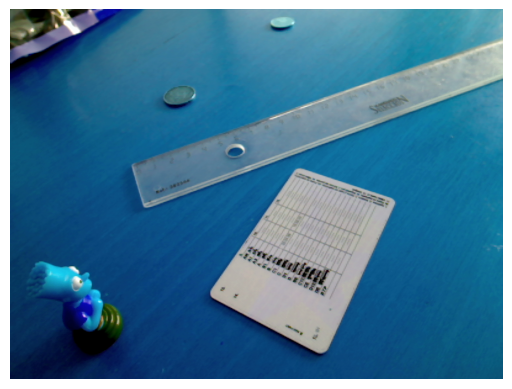

In [4]:
plt.imshow(img)
plt.axis('off');

El problema es que intercambia los canales R y B. Es una curiosidad de OpenCV, que nos encontreremos muchas veces.

Para arreglarlo usamos la función que convierte espacios de color.

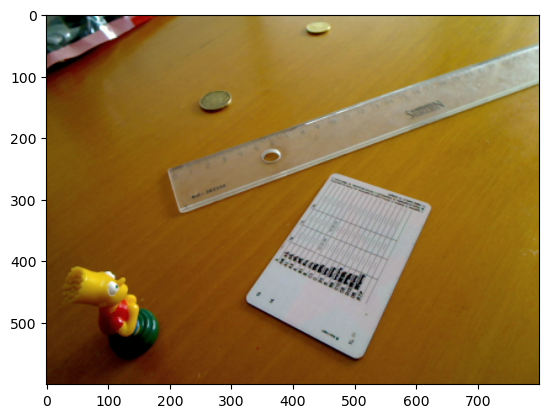

In [5]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB));

Podemos intercambiar los canales aprovechando las posibilidades de indexado de arrays de numpy:

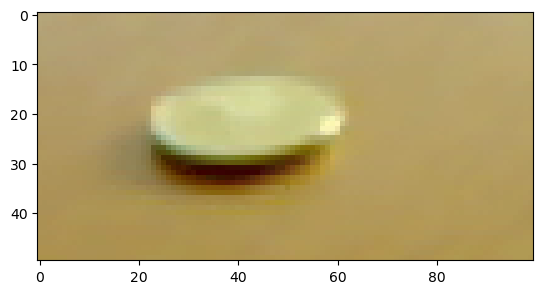

In [6]:
plt.imshow(img[:50,400:500,[2,1,0]]);

Otra posibilidad es usar `imread` de skimage, que además puede leer de url remotas.

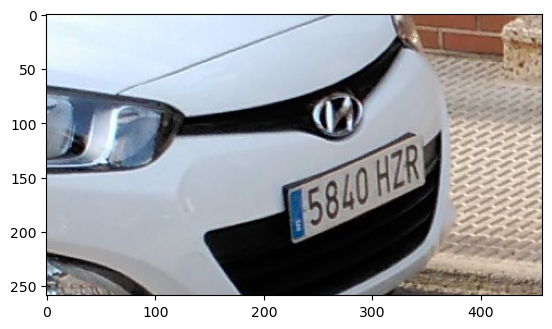

In [7]:
from skimage import io

path = "https://github.com/albertoruiz/umucv/raw/master/images/"

view = io.imread(path+"plate.jpg")
plt.imshow(view);

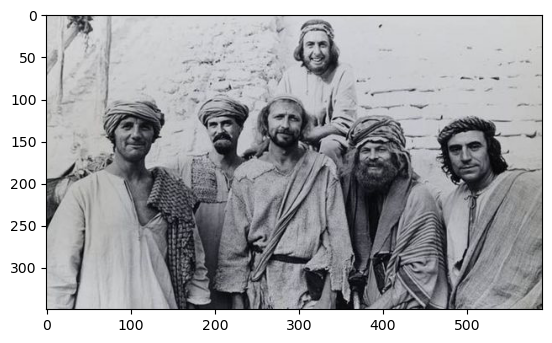

In [8]:
plt.imshow(io.imread("../images/monty-python1.jpg"));

También tenemos [pillow](https://pillow.readthedocs.io/en/stable/index.html):

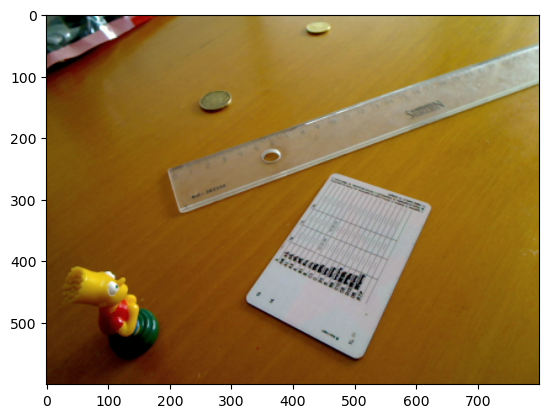

In [9]:
import PIL

plt.imshow(np.array(PIL.Image.open("../images/coins.png")));

## Programas de ejemplo

En las prácticas normalmente trabajaremos con programas interactivos que trabajan con imágenes en vivo. Vamos a comprobar que funcionan correctamente.

En un terminal:

    cd path/to/umucv/code
    
    ./stream.py --dev=../images/rot4.mjpg

Si tienes una webcam conectada:

    ./stream.py

    ./surface.py

    ./facemesh.py

Otros ejemplos:

    cd pose
    ./pose3D.py      --dev=../../images/rot4.mjpg
    ./pose_opengl.py --dev=../../images/rot4.mjpg
    cd ..
    
    cd ../data
    ./get.sh
    cd  ../code/hog
    ./facelandmarks.py

Si alguno de estos ejemplos no funciona el día de la instalación no te preocupes, tendremos tiempo de instalar los paquetes necesarios más adelante.

Lo importante al principio de la asignatura es que funcione el ejemplo `stream.py`.